# In Depth Multinomial Naive Bayes Classifiers 20 News Groups

#### Import Libraries(Python's built-in modules, third party libraries, packages)

In [1]:
# Magic statements.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from pprint import pprint

# Import graph libraries.
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

# Import main modules, packages, and third party libraries.
import numpy as np; from numpy import nan
import pandas as pd
import seaborn as sns; sns.set()

# Import scikit-learn classes: datasets.
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris

# Import scikit-learn classes: preprocessing step utility functions.
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA                # Unsupervised Machine Learning tasks: feature reduction, dimensionality reduction
from sklearn.mixture import GaussianMixture          # Unsupervised Machine Learning tasks: clustering
from sklearn.manifold import Isomap                  # Unsupervised Machine Learning tasks: feature reduction, dimensionality reduction

# Import scikit-learn classes: models (Estimators).
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

# Import scikit-learn classes: preprocessing.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Imputer
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle

from sklearn.neighbors import KNeighborsClassifier

# Import scikit-learn classes: Hyperparameters Validation utility functions.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import LeaveOneOut

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Import scikit-learn classes: model's evaluation step utility functions.
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

In [2]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [3]:
# Global starting variables.
seed = 42
random_state = 1
np.random.seed(seed=None)

# Instantiate, or create, a random generator object.
rng = np.random.RandomState(seed=seed)

#### Load 20-News Groups Dataset

In [4]:
categories = [
    'talk.religion.misc',
    'soc.religion.christian',
    'sci.space',
    'comp.graphics',
]

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

newsgroups_train = fetch_20newsgroups(subset='train')
pprint(list(newsgroups_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [5]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [6]:
print(train.target[5])

3


#### Apply Multinomial Naive Bayes Approach, using TF-IDF feature engeneering technique

In [7]:
Xtrain, ytrain = train.data, train.target
Xtrain, ytrain = shuffle(Xtrain, ytrain, random_state=0)


print('samples type:', type(Xtrain))
print('target type:', type(ytrain))

print('samples size:', len(Xtrain))
print('target size:', ytrain.shape)

samples type: <class 'list'>
target type: <class 'numpy.ndarray'>
samples size: 2153
target size: (2153,)


In [8]:
Xtest, ytest = test.data, test.target
Xtest, ytest = shuffle(Xtest, ytest, random_state=random_state)

print('samples type:', type(Xtest))
print('target type:', type(ytest))

print('samples size:', len(Xtest))
print('target size:', ytest.shape)

samples type: <class 'list'>
target type: <class 'numpy.ndarray'>
samples size: 1432
target size: (1432,)


In [9]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(Xtrain, ytrain)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [10]:
labels = model.predict(Xtest)

Text(89.18, 0.5, 'predicted label')

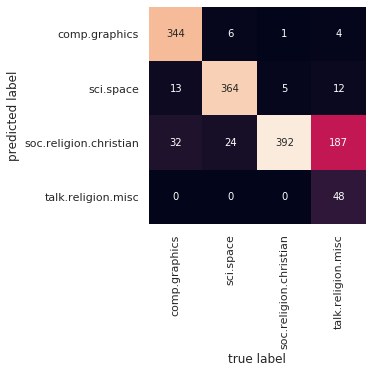

In [11]:
mat = confusion_matrix(ytest, labels)
sns.heatmap(mat.T, square=True,
           annot=True, fmt='d',
           cbar=False,
           xticklabels=train.target_names, yticklabels=train.target_names, )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [12]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [13]:
predict_category('sending a payload to the ISS')

'sci.space'

In [14]:
predict_category('discussing islam versus atheism')

'soc.religion.christian'

In [15]:
predict_category('determinig screen resolution and size')

'comp.graphics'

In [16]:
def run_pipeline(model, train, test, random_state=0, cv=None):
    
    print('Running pipeline...')
    
    Xtrain, ytrain = train.data, train.target
    Xtrain, ytrain = shuffle(Xtrain, ytrain, random_state=random_state)

    Xtest, ytest = test.data, test.target
    Xtest, ytest = shuffle(Xtest, ytest, random_state=random_state)
    if cv is not None:
        print('CV running...')
        Xtrain, ytrain = train.data, train.target
        Xtrain, ytrain = shuffle(Xtrain, ytrain, random_state=0)
        scores = cross_val_score(model, Xtrain, ytrain , cv=cv)
        print(scores)
        print(scores.mean())
        print('CV done.')
    
    model.fit(Xtrain, ytrain)
    labels = model.predict(Xtest)
    
    mat = confusion_matrix(ytest, labels)
    sns.heatmap(mat.T, square=True,
           annot=True, fmt='d',
           cbar=False,
           xticklabels=train.target_names, yticklabels=train.target_names, )
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    
    def predict_category(s, train=train, model=model):
        pred = model.predict([s])
        
        return ', '.join([ str(pred), str(train.target_names[pred[0]]) ])
    
    print('K-Neighbors Classifier accuracy score:', accuracy_score(ytest, labels))
    print(f"K-Neighbors Classifier accuracy score (percentage): {accuracy_score(ytest, labels)*100:.2f}%")
    
    print(predict_category('sending a payload to the ISS'))
    print(predict_category('discussing islam versus atheism'))
    print(predict_category('determinig screen resolution and size'))
    
    print('Pipeline done.')
    return model

Running pipeline...
K-Neighbors Classifier accuracy score: 0.8016759776536313
K-Neighbors Classifier accuracy score (percentage): 80.17%
[1], sci.space
[2], soc.religion.christian
[0], comp.graphics
Pipeline done.


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

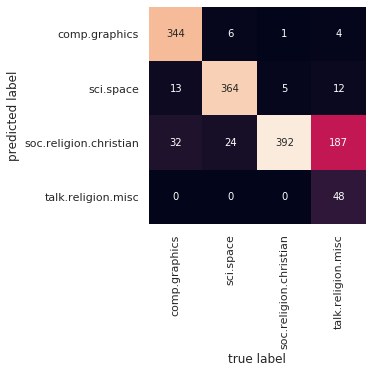

In [17]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
run_pipeline(model, train, test)

Running pipeline...
K-Neighbors Classifier accuracy score: 0.9168994413407822
K-Neighbors Classifier accuracy score (percentage): 91.69%
[1], sci.space
[3], talk.religion.misc
[0], comp.graphics
Pipeline done.


Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

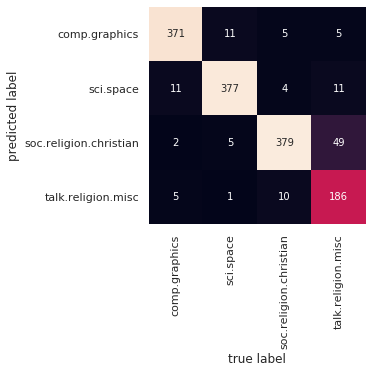

In [18]:
model = make_pipeline(CountVectorizer(), MultinomialNB())
run_pipeline(model, train, test)

### Multinomial Logistic Regression Estimator (Technique, Approach, Statistical learning Method)

Running pipeline...
K-Neighbors Classifier accuracy score: 0.8924581005586593
K-Neighbors Classifier accuracy score (percentage): 89.25%
[0], comp.graphics
[0], comp.graphics
[0], comp.graphics
Pipeline done.


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...tern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept

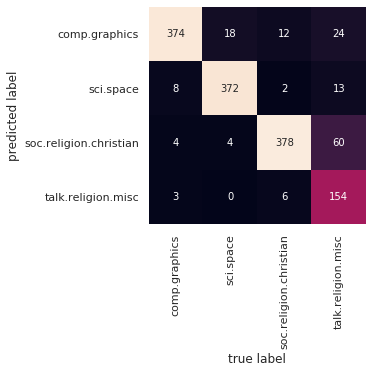

In [19]:
model = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression(
        solver='sag',
        multi_class='multinomial')
)
run_pipeline(model, train, test)

Running pipeline...
K-Neighbors Classifier accuracy score: 0.8791899441340782
K-Neighbors Classifier accuracy score (percentage): 87.92%
[0], comp.graphics
[0], comp.graphics
[0], comp.graphics
Pipeline done.


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercep

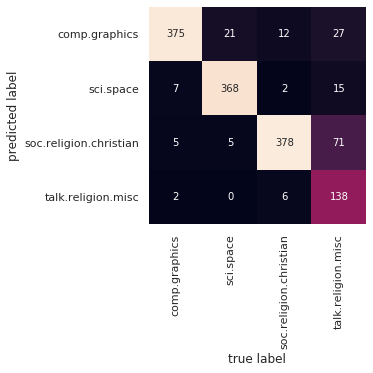

In [20]:
model = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression(
        solver='sag',
        multi_class='ovr')
)
run_pipeline(model, train, test)

### K-Neighbors Classifier Estimator (Technique, Approach, Statistical learning Method)

Running pipeline...
K-Neighbors Classifier accuracy score: 0.8296089385474861
K-Neighbors Classifier accuracy score (percentage): 82.96%
[1], sci.space
[3], talk.religion.misc
[0], comp.graphics
Pipeline done.

CV KNeighborsClassifier, running...
[0.91435185 0.92824074 0.89791183 0.94418605 0.9088785 ]
0.9187137953447506
CV KNeighborsClassifier, done.


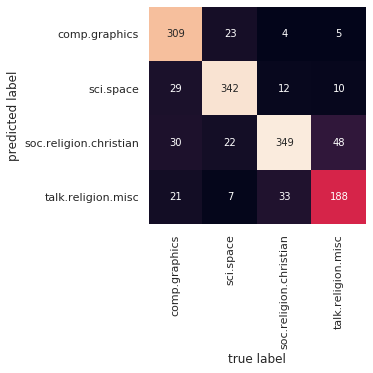

In [21]:
model = make_pipeline(
    TfidfVectorizer(),
    KNeighborsClassifier(n_neighbors=1)
)
run_pipeline(model, train, test)

print()
print('CV KNeighborsClassifier, running...')
Xtrain, ytrain = train.data, train.target
Xtrain, ytrain = shuffle(Xtrain, ytrain, random_state=0)
scores = cross_val_score(model, Xtrain, ytrain , cv=5)
print(scores)
print(scores.mean())
print('CV KNeighborsClassifier, done.')

    loo = LeaveOneOut()
    Xtrain, ytrain = train.data, train.target
    scores = cross_val_score(model, Xtrain, ytrain, cv=loo)
    print(scores)
    print(scores.mean())

### Multinomial Logistic Regression Estimator (Technique, Approach, Statistical learning Method)
#### Grid Search Approach

Running pipeline...
CV running...
[0.90509259 0.9212963  0.90951276 0.92093023 0.89485981]
0.9103383391104044
CV done.
K-Neighbors Classifier accuracy score: 0.8798882681564246
K-Neighbors Classifier accuracy score (percentage): 87.99%
[0], comp.graphics
[0], comp.graphics
[0], comp.graphics
Pipeline done.


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercep

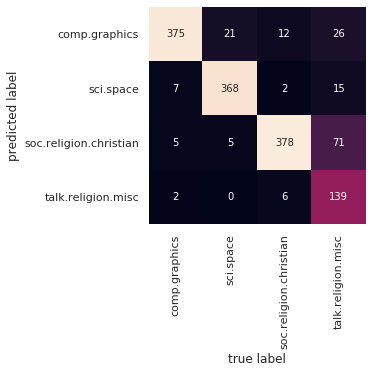

In [22]:
def PolynomialLogisticRegression(degree=2, **kwargs):
    return make_pipeline(
        PolynomialFeatures(degree),
        LogisticRegression(**kwargs))

param_grid = {
    # 'polynomialfeatures__degree': np.arange(5),
    # 'logisticregression__penalty': ['l1', 'l2', 'elastic', 'none'],
    'logisticregression__penalty': ['l2'],
    'logisticregression_multi_class': ['multi_class, ovr'],
    'logisticregression__C': [0.001, 0.01, 0.1, 1.0],
    # 'logisticregression__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga',], }
    'logisticregression__solver':['newton-cg', 'lbfgs', 'sag', 'saga',], }
    # 'logisticregression__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga',], }

model = make_pipeline(
    TfidfVectorizer(),
    # PolynomialLogisticRegression()
    LogisticRegression()
)
run_pipeline(model, train, test, cv=5)

In [29]:
NUM_TRIALS = 30

param_grid = {
    # 'polynomialfeatures__degree': np.arange(5),
    # 'logisticregression__penalty': ['l1', 'l2', 'elastic', 'none'],
    'logisticregression__penalty': ['l2'],
    'logisticregression_multi_class': ['multi_class, ovr'],
    'logisticregression__C': [0.001, 0.01, 0.1, 1.0],
    # 'logisticregression__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga',], }
    'logisticregression__solver':['newton-cg', 'lbfgs', 'sag', 'saga',], }
    # 'logisticregression__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga',], }

Xtrain, ytrain = train.data, train.target
Xtrain, ytrain = shuffle(Xtrain, ytrain, random_state=random_state)

Xtest, ytest = test.data, test.target
Xtest, ytest = shuffle(Xtest, ytest, random_state=random_state)

tfidf = TfidfVectorizer()
tfidf.fit(Xtrain)
Xtrain = tfidf.transform(Xtrain)

model = LogisticRegression()

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    nested_score = cross_val_score(model, X=Xtrain, y=ytrain, cv=outer_cv)
    model.fit(Xtrain, ytrain)
    non_nested_scores[i] = model.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(model, X=Xtrain, y=ytrain, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'best_score_'

In [ ]:
param_grid = {
              'kneighborsclassifier__n_neighbors':[1,2,3,5,7,9,10,20], 
}
grid = GridSearchCV(PolynomialLogisticRegression(), param_grid, cv=7)

model = make_pipeline(
    TfidfVectorizer(),
    KNeighborsClassifier()
)
model = run_pipeline(model, train, test)

model.cv_results_

#### References
- (The 20 newsgroups text dataset) https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

- Logistic Regression technique, classifier, estimator:
    - (Constructor) https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    - (Example) https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html#sphx-glr-auto-examples-linear-model-plot-logistic-multinomial-py
- (Shuffle) https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html